In [7]:
using DelimitedFiles
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

In [8]:
lo_train = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "lorenz_train_0_05.txt")))
lo_test = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "lorenz_test_0_05.txt")))

10001-element Vector{Float64}:
  -0.7081105746641868
  -1.0655725978683848
  -1.632156366355012
  -2.547045618142249
  -4.02751892253803
  -6.378718286912411
  -9.869360162880017
 -14.133670318936842
 -17.00902718809827
 -15.472867332316168
   ⋮
  13.755412712722647
  10.388651793674478
   6.563100105282945
   3.6436064205554284
   1.850372101320824
   0.89044579875696
   0.42713652720890416
   0.22641853703532017
   0.15695046818267286

In [9]:
testing_params = create_testing_params(
    readout_switching = false
)

TestingParameters(false, false, false, false)

Created reservoir of size: (600,)


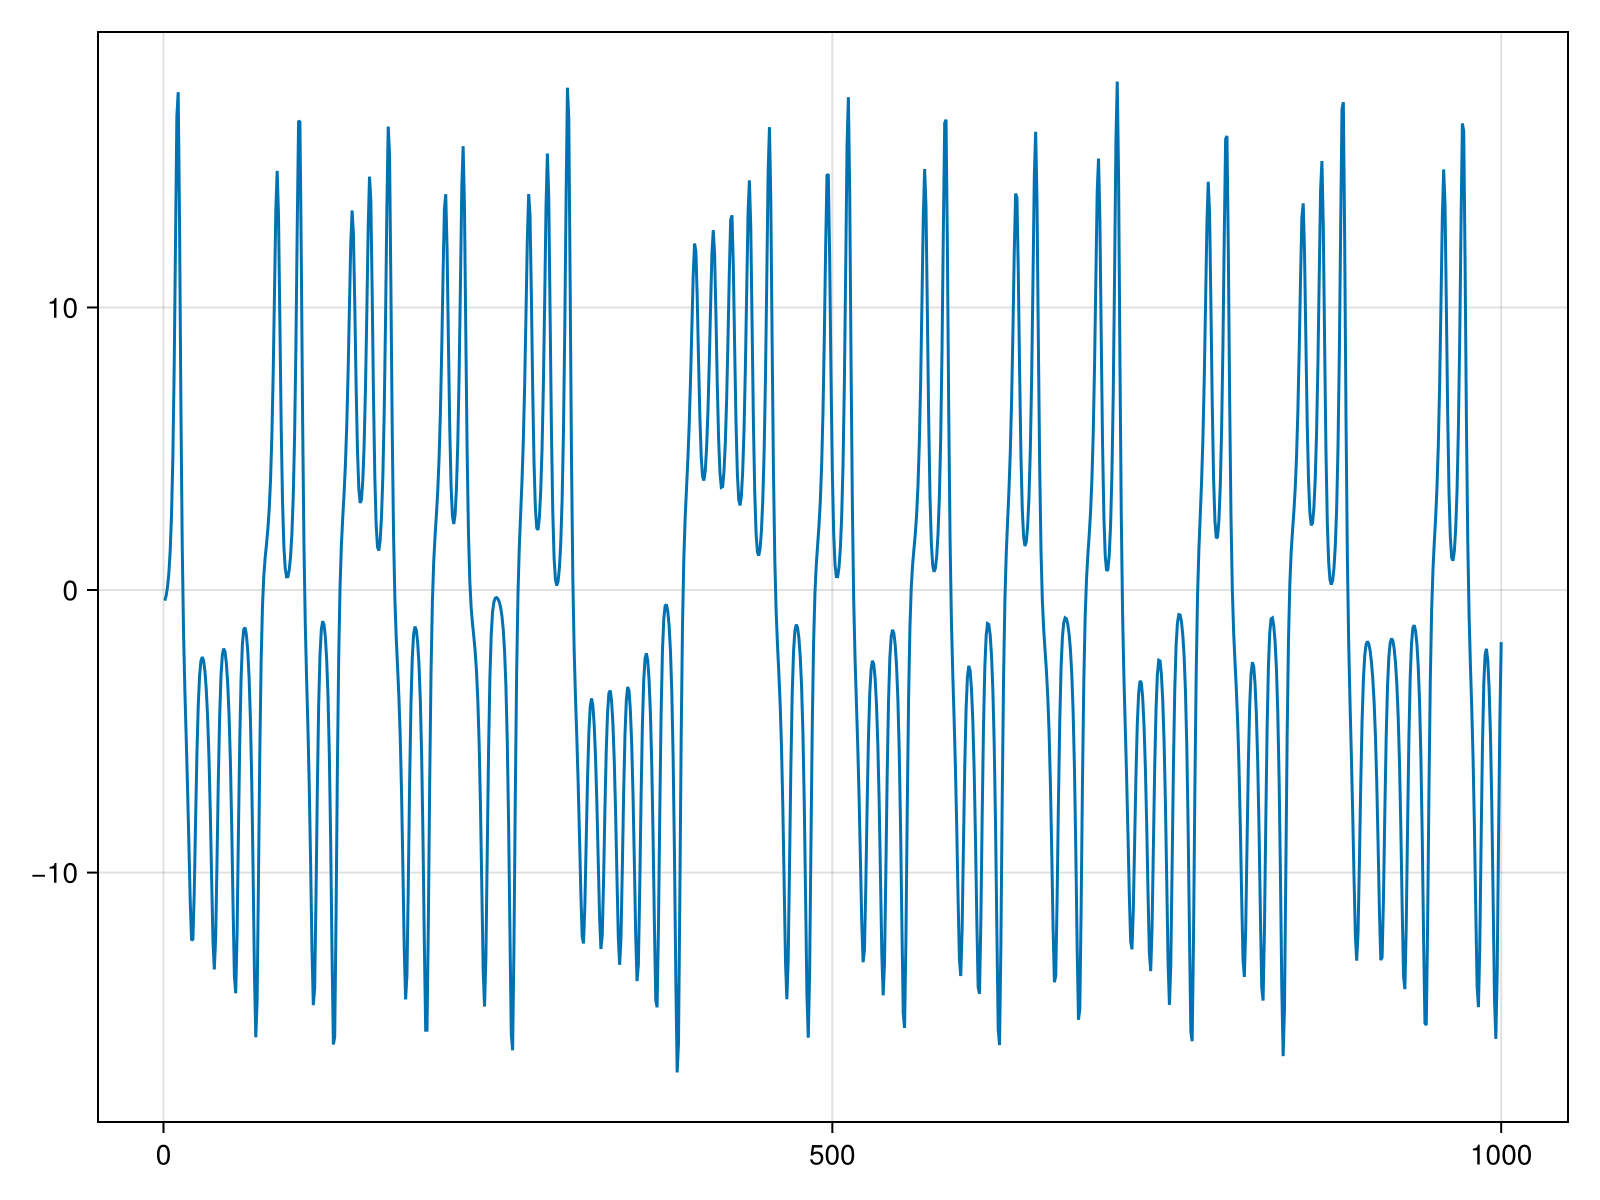

In [10]:
# preds = create_pred_for_params_free_run(lo_train, 100, 3; k = 400, testing_params=testing_params)
preds = create_pred_for_params_multi_step(lo_train, lo_test, 3, 1000; k = 100, testing_params=testing_params)
fig = quick_graph_series(preds[1:1000])

CairoMakie.save("sub_reservoirs_freerun.pdf", fig)

fig

Created reservoir of size: (600,)
Created reservoir of size: (600,)
Overall RMSE:
    Vanilla: 11.998169484600526
    Ordinal network reservoir: 12.239993235676785
Turning partition RMSE:
    Vanilla: 13.437892969895433
    Ordinal network reservoir: 11.539507020958084


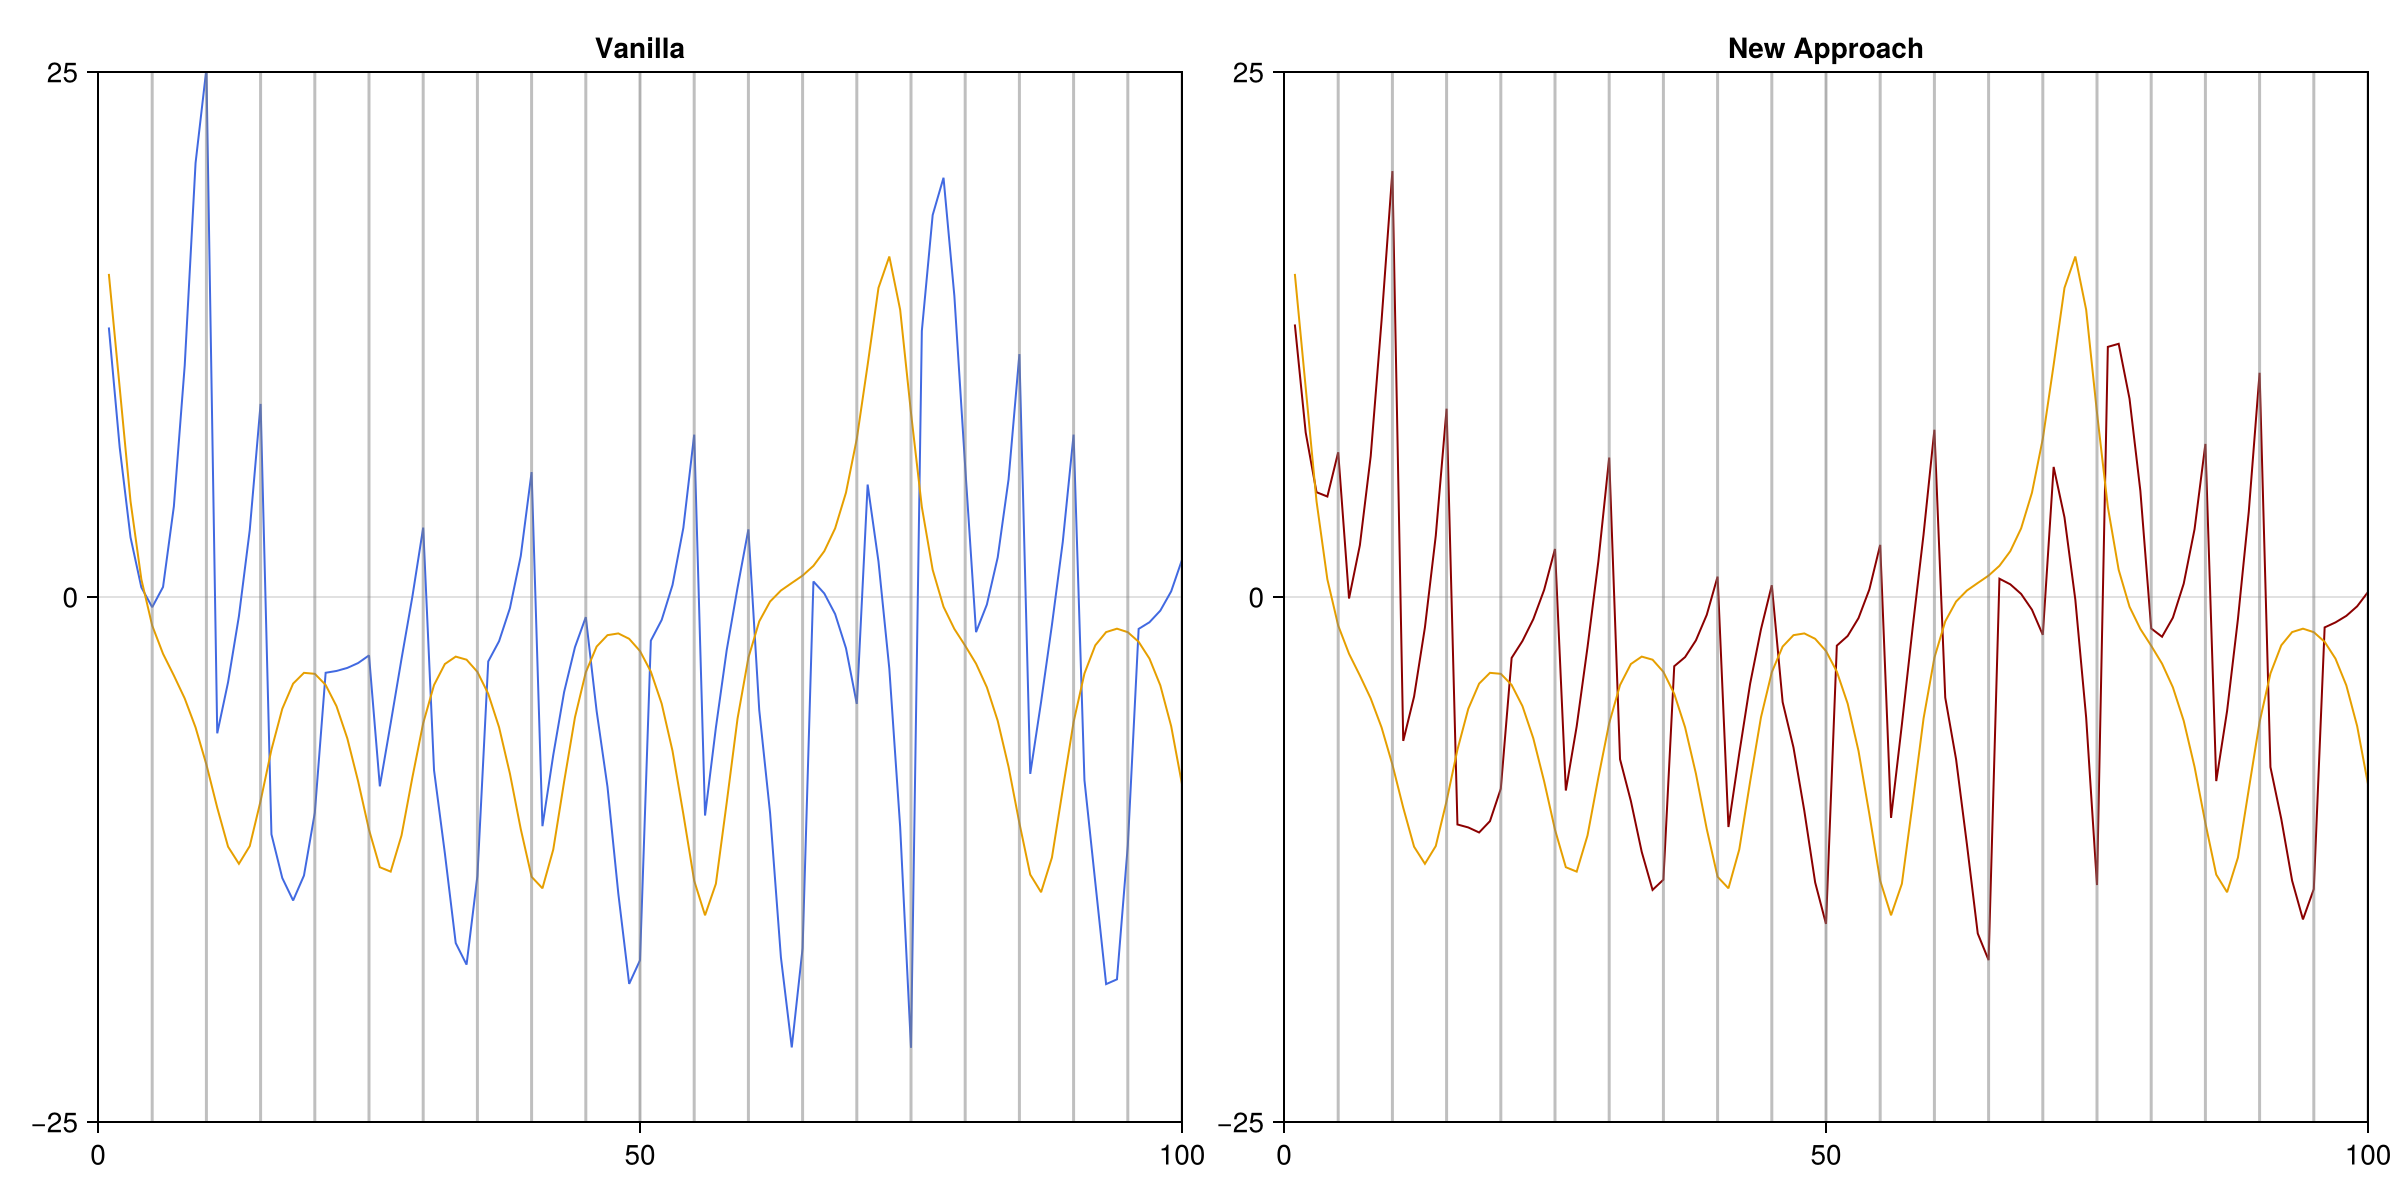

In [11]:
fig = test_multi_step(lo_train, lo_test, 3, 100; n_steps=5, from=0, to=100, testing_params=testing_params)

CairoMakie.save("sub_reservoirs_multistep.pdf", fig)

fig